In [ ]:
# data 열 이름 확인
import pandas as pd
df = pd.read_csv('hipparcos-voidmain.csv')
df.columns

Index(['Catalog', 'HIP', 'Proxy', 'RAhms', 'DEdms', 'Vmag', 'VarFlag',
       'r_Vmag', 'RAdeg', 'DEdeg', 'AstroRef', 'Plx', 'pmRA', 'pmDE',
       'e_RAdeg', 'e_DEdeg', 'e_Plx', 'e_pmRA', 'e_pmDE', 'DE:RA', 'Plx:RA',
       'Plx:DE', 'pmRA:RA', 'pmRA:DE', 'pmRA:Plx', 'pmDE:RA', 'pmDE:DE',
       'pmDE:Plx', 'pmDE:pmRA', 'F1', 'F2', '---', 'BTmag', 'e_BTmag', 'VTmag',
       'e_VTmag', 'm_BTmag', 'B-V', 'e_B-V', 'r_B-V', 'V-I', 'e_V-I', 'r_V-I',
       'CombMag', 'Hpmag', 'e_Hpmag', 'Hpscat', 'o_Hpmag', 'm_Hpmag', 'Hpmax',
       'HPmin', 'Period', 'HvarType', 'moreVar', 'morePhoto', 'CCDM', 'n_CCDM',
       'Nsys', 'Ncomp', 'MultFlag', 'Source', 'Qual', 'm_HIP', 'theta', 'rho',
       'e_rho', 'dHp', 'e_dHp', 'Survey', 'Chart', 'Notes', 'HD', 'BD', 'CoD',
       'CPD', '(V-I)red', 'SpType', 'r_SpType'],
      dtype='object')

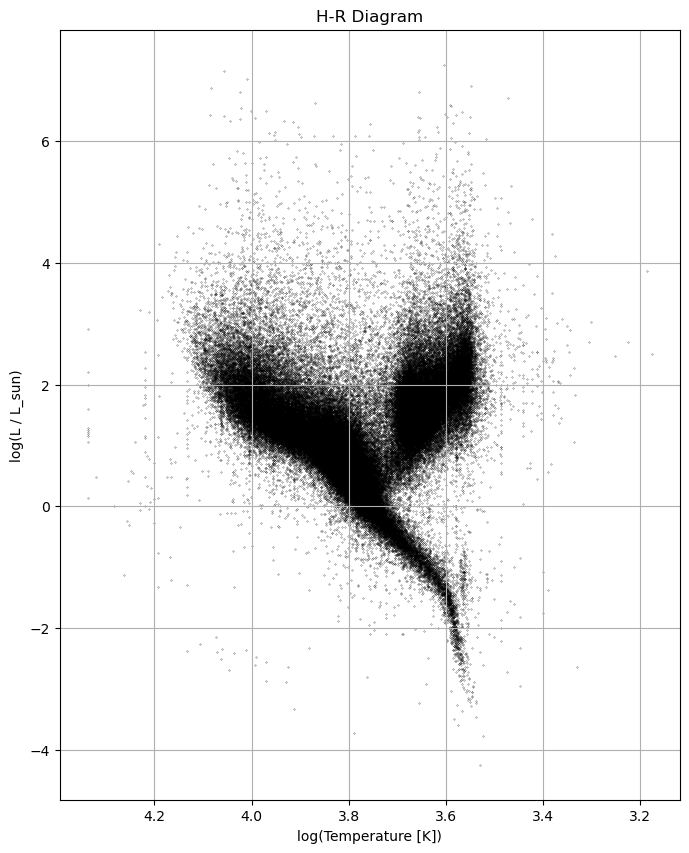

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('hipparcos-voidmain.csv')

df = df[(df['Plx'] > 0) & (df['B-V'].notnull()) & (df['Vmag'].notnull())].copy()

df['AbsMag'] = df['Vmag'] - 5 * (np.log10(1000 / df['Plx']) - 1)
df['log_L'] = -0.4 * (df['AbsMag'] - 4.83)

B_V = df['B-V']
T_eff = 4600 * (1 / (0.92 * B_V + 1.7) + 1 / (0.92 * B_V + 0.62))
df['log_T'] = np.log10(T_eff)

plt.figure(figsize=(8, 10))
plt.scatter(df['log_T'], df['log_L'], s=0.2**2, color='k')
plt.gca().invert_xaxis()
plt.xlabel('log(Temperature [K])')
plt.ylabel('log(L / L_sun)')
plt.title('H-R Diagram')
plt.grid(True)
plt.show()

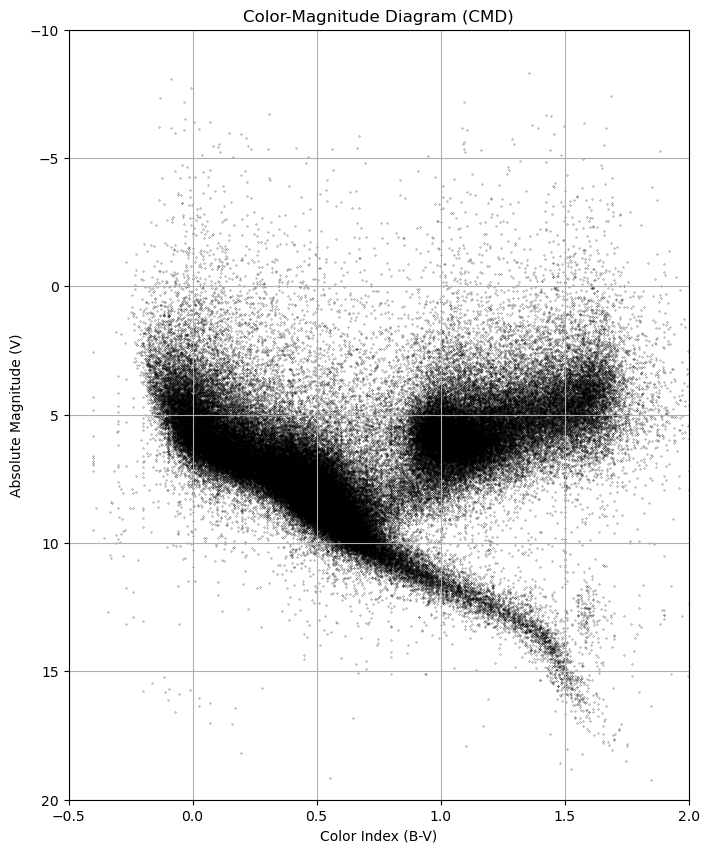

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('hipparcos-voidmain.csv')

df = df[(df['Plx'] > 0) & (df['Vmag'].notnull()) & (df['B-V'].notnull())]

df['AbsMag'] = df['Vmag'] + 5 * np.log10(df['Plx'] / 100.) + 5

plt.figure(figsize=(8, 10))
plt.scatter(df['B-V'], df['AbsMag'], s = 0.2**2, c = 'black')

plt.xlabel('Color Index (B-V)')
plt.ylabel('Absolute Magnitude (V)')
plt.title('Color-Magnitude Diagram (CMD)')
plt.grid(True)
plt.xlim((-0.5, 2))
plt.ylim((-10, 20))
plt.gca().invert_yaxis()

plt.show()

In [1]:
import pandas as pd

df = pd.read_csv('ngc188_data.csv', low_memory=False)
df.columns

Index(['Unnamed: 0', 'solution_id', 'DESIGNATION', 'source_id', 'random_index',
       'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec',
       'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr',
       'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'astrometric_primary_flag', 'astrometric_weight_al',
       'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error',
       'mean_varpi_factor_al', 'astrometric_matched_observations',
       'visibility_periods_used', 'astrometric_sigma5d_max',
       'frame_rotator

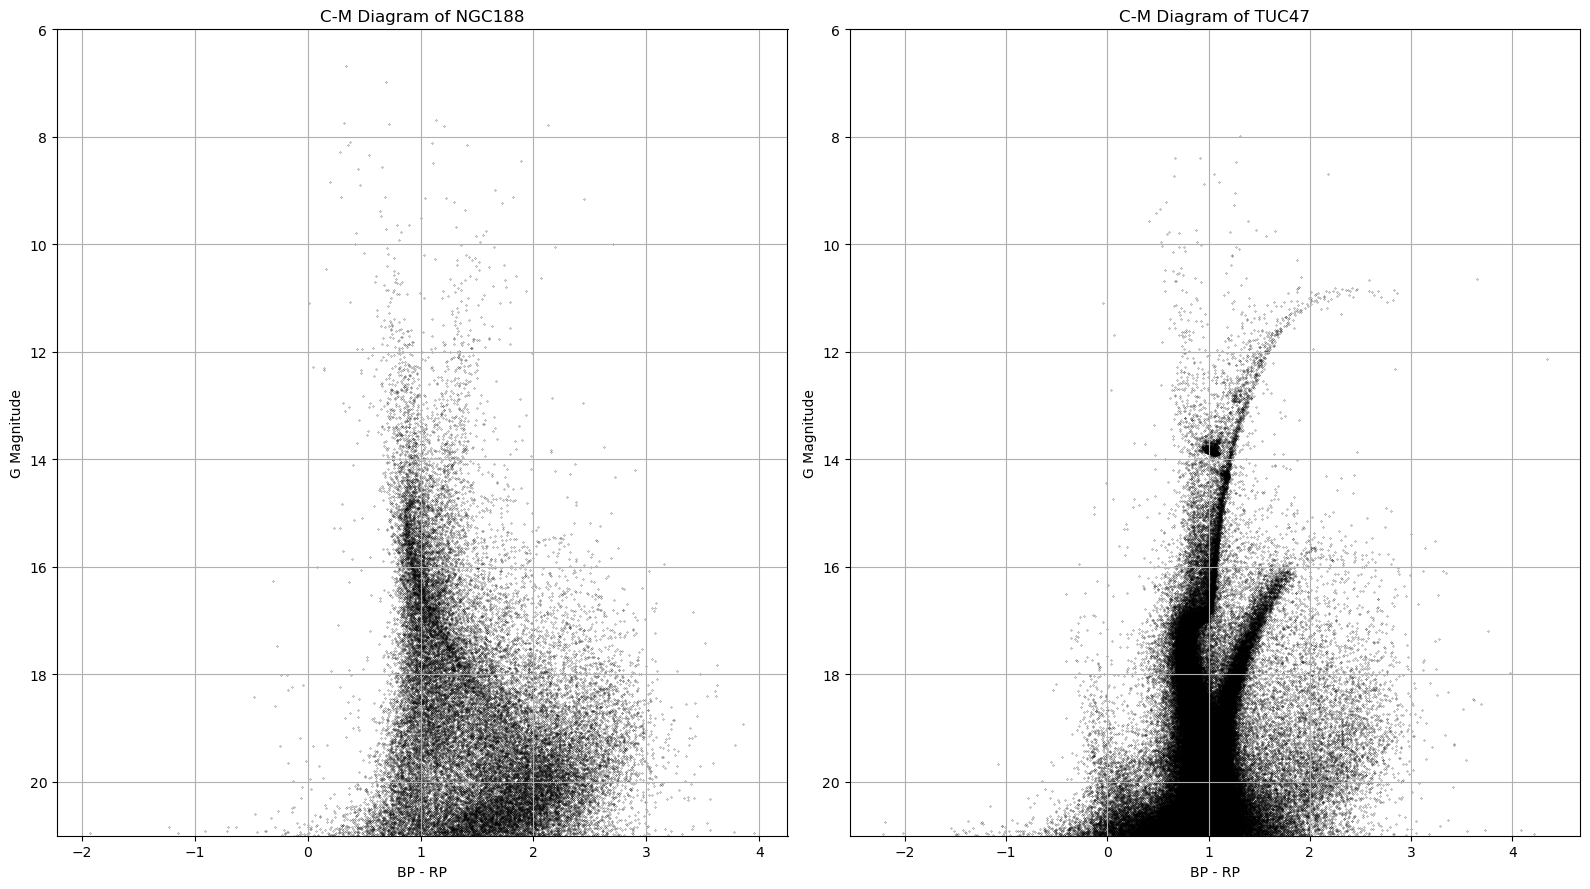

In [9]:
# 구상/산개성단 비교
import pandas as pd
import matplotlib.pyplot as plt

files = ['ngc188_data.csv', 'tuc47_data.csv']

fig, ax = plt.subplots(1, 2, figsize = (16, 9))
for i, file in enumerate(files):
    df = pd.read_csv(file, low_memory=False)
    df = df.dropna(subset=["bp_rp", "phot_g_mean_mag"])
    name = file[:-9]
    name = name.upper()
    ax[i].scatter(df["bp_rp"], df["phot_g_mean_mag"], s = 0.2 ** 2, color='black')
    ax[i].set_ylim(6, np.max(df['phot_g_mean_mag']))
    ax[i].invert_yaxis()
    ax[i].set_xlabel("BP - RP")
    ax[i].set_ylabel("G Magnitude")
    ax[i].set_title("C-M Diagram of " + name)
    ax[i].grid(True)
plt.tight_layout()
plt.show()

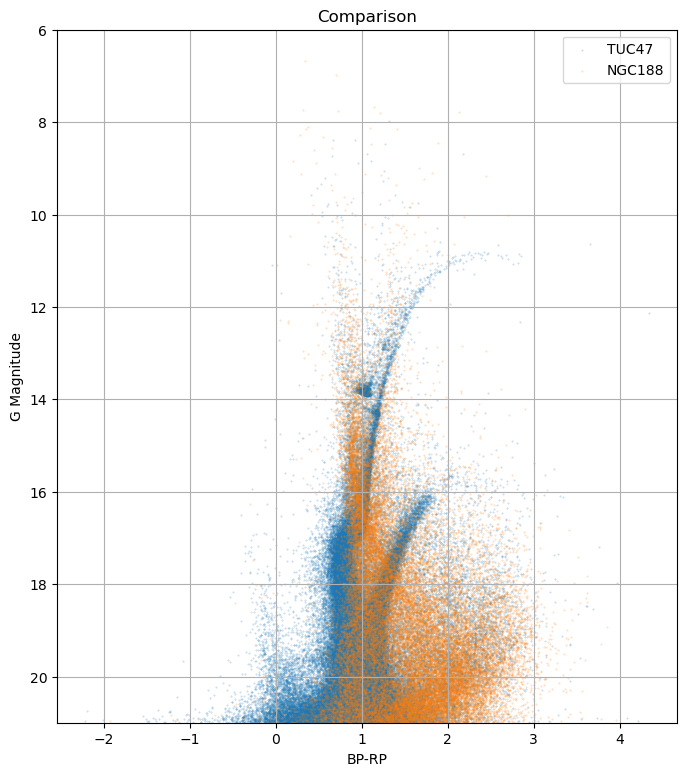

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

files = ['tuc47_data.csv', 'ngc188_data.csv']
plt.figure(figsize = (8, 9))
for file in files:
    df = pd.read_csv(file, low_memory=False)
    df = df.dropna(subset=["bp_rp", "phot_g_mean_mag"])
    name = file[:-9]
    name = name.upper()
    plt.scatter(df["bp_rp"], df["phot_g_mean_mag"], s = 0.4 ** 2, alpha = 0.3, label = name)
plt.ylim(6, np.max(df['phot_g_mean_mag']))
plt.gca().invert_yaxis()
plt.xlabel("BP-RP")
plt.ylabel("G Magnitude")
plt.title("Comparison")
plt.grid(True)
plt.legend()
plt.show()